# IMPORTS

In [0]:
import skimage as sk
import skimage.transform
import skimage.draw
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# CODE

In [0]:
def generate_shapes_image(img_shape, max_shapes, multichannel, center_shape=False, random_rotations=None, add_padding=False, invert_colours=False, intensity_range=None, min_size=2, max_size=None, allow_overlap=False, shape=None, min_rectangle_tolerance=2):
    assert img_shape[0] % 2 == 0,'Rows in shape must be even'
    assert img_shape[1] % 2 == 0,'Columns in shape must be even'
    
    outside_boundaries = True
    perfect_square = False
    while outside_boundaries or perfect_square:
        img, shapes_coords = skimage.draw.random_shapes(img_shape, max_shapes, multichannel=multichannel, intensity_range=None, min_size=min_size, max_size=max_size, allow_overlap=allow_overlap, shape=shape)
        rows, cols = shapes_coords[0][1]
        r0, r1 = rows
        c0, c1 = cols
        # print(r0,r1,c0,c1)
        outside_boundaries = r0 < 0 or c0 < 0 or r1 >= img_shape[0] or c1 >= img_shape[1]
        # perfect_square = ( ((r1-r0)*(c1-c0))**0.5 ).is_integer()
        perfect_square = abs((r1-r0) - (c1-c0)) <= min_rectangle_tolerance if shapes_coords[0][0] == 'rectangle' else False
    # if shapes_coords[0][0] == 'rectangle': print('Rectangleness of the rectangle:', abs((r1-r0) - (c1-c0)))

    img = img/255.0

    if center_shape:
        new_img = np.ones_like(img)
        shape_height, shape_width = r1-r0, c1-c0
        if shape_height % 2 != 0:
            shape_height += 1
            r1 += 1
        if shape_width % 2 != 0:
            shape_width += 1
            c1 += 1

        # print(r0,r1,c0,c1)
        start_row, start_col = int(img_shape[0]/2)-int(shape_height/2), int(img_shape[1]/2)-int(shape_width/2)
        end_row, end_col = start_row+shape_height, start_col+shape_width
        new_img[start_row:end_row, start_col:end_col] = img[r0:r1, c0:c1]
        img = new_img
        # print(start_row, img_shape[0]-end_row)
        # print(start_col, img_shape[1]-end_col)

        if random_rotations:
            angle = random.sample(random_rotations, k=1)
            img = skimage.transform.rotate(img, angle, mode='constant', cval=1, order=1, preserve_range=True)

    if add_padding:
        pad_width = [(int(img_shape[0]/2), int(img_shape[0]/2)), (int(img_shape[0]/2), int(img_shape[0]/2))] if not multichannel else [(int(img_shape[0]/2), int(img_shape[0]/2)), (int(img_shape[0]/2), int(img_shape[0]/2)), (0,0)]
        # print(pad_width)
        img = sk.util.pad(img, pad_width, mode='constant', constant_values=1)
    
    if invert_colours:
        background_idx = img == 1
        shapes_idx = img != 1

        img[background_idx] = 0
        if not multichannel: img[shapes_idx] = 1
    
    # img = sk.util.img_as_float32(img)
    img = img - img.min()
    img = img / img.max()
    
    return img, shapes_coords

def generate_square_image(img_shape, multichannel, random_rotations=None, invert_colours=False, intensity_range=None, min_size=2, max_size=None):
    assert img_shape[0] % 2 == 0,'Rows in shape must be even'
    assert img_shape[1] % 2 == 0,'Columns in shape must be even'

    edge_size = random.randint(min_size, max_size if max_size is not None else int(img_shape[0]*0.65) )
    if edge_size % 2 != 0: edge_size -= 1
    # print(edge_size)

    center_row, center_col = int(img_shape[0]/2), int(img_shape[1]/2)
    start_row, start_col = center_row-int(edge_size/2), center_col-int(edge_size/2)
    end_row, end_col = center_row+int(edge_size/2), center_col+int(edge_size/2)

    img = np.ones(img_shape)*255

    if multichannel:
        if intensity_range:
            assert len(intensity_range) == img_shape[2]
            colours_from = intensity_range
        else:
            colours_from = [(0, 255) for i in range(img_shape[2])]
        
        square_red = random.randint(colours_from[0][0], colours_from[0][1])
        square_green = random.randint(colours_from[1][0], colours_from[1][1])
        square_blue = random.randint(colours_from[2][0], colours_from[2][1])
        
        img[start_row:end_row, start_col:end_col, 0] = square_red
        img[start_row:end_row, start_col:end_col, 1] = square_green
        img[start_row:end_row, start_col:end_col, 2] = square_blue
    else:
        img[start_row:end_row, start_col:end_col] = 0

    if random_rotations:
        angle = random.sample(random_rotations, k=1)
        img = skimage.transform.rotate(img, angle, mode='constant', cval=255, order=1, preserve_range=True)

    img = img / 255.0

    if invert_colours:
        background_idx = img == 1
        shapes_idx = img != 1

        img[background_idx] = 0
        if not multichannel: img[shapes_idx] = 1

    # img = sk.util.img_as_float32(img)
    img = img - img.min()
    img = img / img.max()
    return img, ('square', ((start_row, end_row), (start_col, end_col)))


# TESTING

float64 (64, 64) 1.0 0.0
triangle


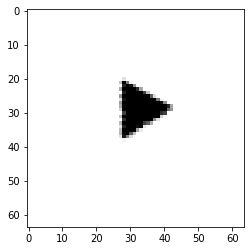

float64 (64, 64) 1.0 0.0
rectangle


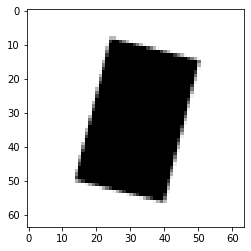

float64 (64, 64) 1.0 0.0
circle


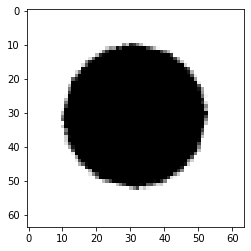

float64 (64, 64) 1.0 0.0
triangle


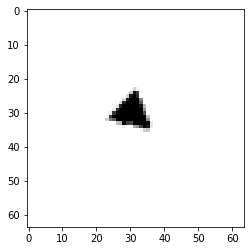

float64 (64, 64) 1.0 0.0
circle


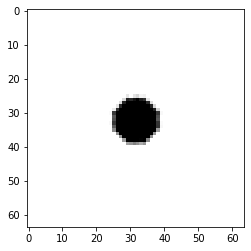

float64 (64, 64) 1.0 0.0
triangle


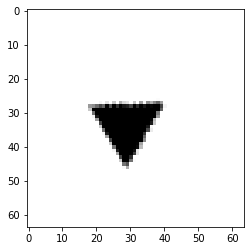

float64 (64, 64) 1.0 0.0
circle


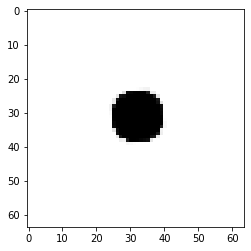

float64 (64, 64) 1.0 0.0
circle


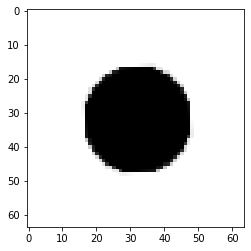

float64 (64, 64) 1.0 0.0
triangle


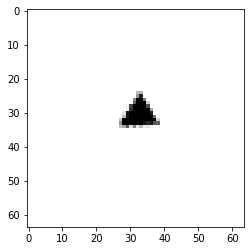

float64 (64, 64) 1.0 0.0
triangle


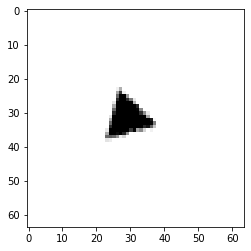

In [4]:
img_shape = (64, 64)
multichannel = len(img_shape) == 3
shape = None # None to generate all
min_rectangle_tolerance = 5 # Only applied to rectangle shapes
max_shapes = 1
min_size = 12
max_size = 50
center_shape = True
random_rotations = list(range(1, 361, 15)) # Only applied when center_shape is True
add_padding = False
intensity_range = None

N = 10
for i in range(N):
    img, shapes_coords = generate_shapes_image(img_shape, max_shapes, multichannel, center_shape=center_shape, add_padding=add_padding, min_size=min_size,
                                               max_size=max_size, shape=shape, min_rectangle_tolerance=min_rectangle_tolerance, random_rotations=random_rotations, intensity_range=intensity_range)
    print(img.dtype, img.shape, img.max(), img.min())
    print(shapes_coords[0][0])
    if not multichannel: plt.imshow(img, cmap='gray')
    else: plt.imshow(img)
    plt.show()

    i += 1
    if i >= N: break

float64 (64, 64) 1.0 0.0
square


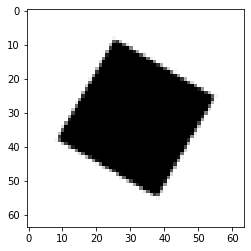

float64 (64, 64) 1.0 0.0
square


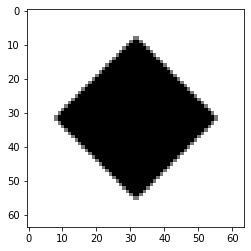

float64 (64, 64) 1.0 0.0
square


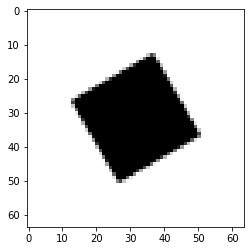

float64 (64, 64) 1.0 0.0
square


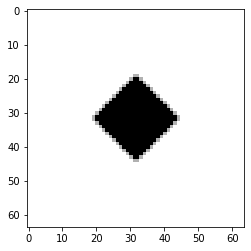

float64 (64, 64) 1.0 0.0
square


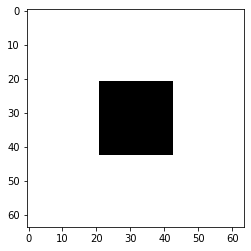

float64 (64, 64) 1.0 0.0
square


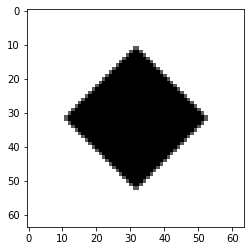

float64 (64, 64) 1.0 0.0
square


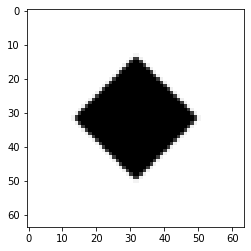

float64 (64, 64) 1.0 0.0
square


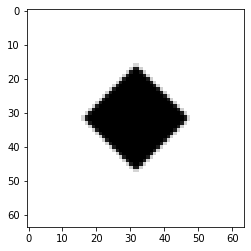

float64 (64, 64) 1.0 0.0
square


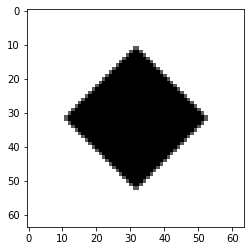

float64 (64, 64) 1.0 0.0
square


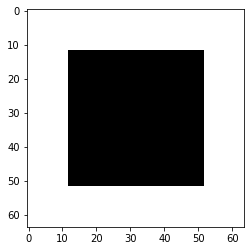

In [5]:
img_shape = (64, 64)
multichannel = len(img_shape) == 3
min_size = 12
max_size = None
random_rotations = [30, 45, 60, 90] #list(range(1, 361, 15))
intensity_range = None

N = 10
for i in range(N):
    img, shapes_coords = generate_square_image(img_shape, multichannel, random_rotations=random_rotations, intensity_range=intensity_range, min_size=min_size, max_size=max_size)
    print(img.dtype, img.shape, img.max(), img.min())
    print(shapes_coords[0])
    if not multichannel: plt.imshow(img, cmap='gray')
    else: plt.imshow(img)
    plt.show()
    
    i += 1
    if i >= N: break

# GENERATION

In [0]:
# COMMON PARAMS
img_shape = (64, 64)
multichannel = len(img_shape) == 3
center_shape = True

## CIRCLES

In [0]:
img_dir = './circles_gray/'
shape = 'circle' # None to generate all
expls = 'EX0'

min_rectangle_tolerance = 5 # Only applied to rectangle shapes
max_shapes = 1
min_size = 12
max_size = 60
random_rotations = list(range(1, 361, 1)) # Only applied when center_shape is True
add_padding = False
intensity_range = None

if not os.path.exists(img_dir):
    os.mkdir(img_dir)

N = 1000 * 3
for i in range(N):
    img, shapes_coords = generate_shapes_image(img_shape, max_shapes, multichannel, center_shape=center_shape, add_padding=add_padding, min_size=min_size,
                                               max_size=max_size, shape=shape, min_rectangle_tolerance=min_rectangle_tolerance, random_rotations=random_rotations, intensity_range=intensity_range)
    # print(img.dtype, img.shape, img.max(), img.min())
    # print(shapes_coords[0][0])
    # if not multichannel: plt.imshow(img, cmap='gray')
    # else: plt.imshow(img)
    # plt.show()

    sk.io.imsave(img_dir+str(i)+'_'+expls+'.png', sk.img_as_ubyte(img) )

    i += 1
    if i >= N: break

In [0]:
!zip -r circles_gray.zip circles_gray

  adding: circles_gray/ (stored 0%)
  adding: circles_gray/1355_EX0.png (stored 0%)
  adding: circles_gray/1093_EX0.png (stored 0%)
  adding: circles_gray/1707_EX0.png (stored 0%)
  adding: circles_gray/1185_EX0.png (stored 0%)
  adding: circles_gray/1949_EX0.png (deflated 3%)
  adding: circles_gray/1993_EX0.png (deflated 0%)
  adding: circles_gray/2791_EX0.png (stored 0%)
  adding: circles_gray/1039_EX0.png (stored 0%)
  adding: circles_gray/2282_EX0.png (stored 0%)
  adding: circles_gray/1447_EX0.png (deflated 2%)
  adding: circles_gray/2362_EX0.png (deflated 3%)
  adding: circles_gray/216_EX0.png (deflated 2%)
  adding: circles_gray/2745_EX0.png (deflated 3%)
  adding: circles_gray/93_EX0.png (stored 0%)
  adding: circles_gray/2435_EX0.png (deflated 4%)
  adding: circles_gray/254_EX0.png (deflated 0%)
  adding: circles_gray/2087_EX0.png (deflated 4%)
  adding: circles_gray/739_EX0.png (deflated 2%)
  adding: circles_gray/1731_EX0.png (stored 0%)
  adding: circles_gray/2594_EX0.png (

## TRIANGLES

In [0]:
img_dir = './triangles_gray/'
shape = 'triangle' # None to generate all
expls = 'EX1_EX4'

max_shapes = 1
min_size = 12
max_size = 45
random_rotations = list(range(1, 361, 1)) # Only applied when center_shape is True
add_padding = False
intensity_range = None

if not os.path.exists(img_dir):
    os.mkdir(img_dir)

N = 1000 * 3
for i in range(N):
    img, shapes_coords = generate_shapes_image(img_shape, max_shapes, multichannel, center_shape=center_shape, add_padding=add_padding, min_size=min_size,
                                               max_size=max_size, shape=shape, random_rotations=random_rotations, intensity_range=intensity_range)
    # print(img.dtype, img.shape, img.max(), img.min())
    # print(shapes_coords[0][0])
    # if not multichannel: plt.imshow(img, cmap='gray')
    # else: plt.imshow(img)
    # plt.show()

    sk.io.imsave(img_dir+str(i)+'_'+expls+'.png', sk.img_as_ubyte(img) )

    i += 1
    if i >= N: break

In [0]:
!zip -r triangles_gray.zip triangles_gray

  adding: triangles_gray/ (stored 0%)
  adding: triangles_gray/2726_EX1_EX4.png (stored 0%)
  adding: triangles_gray/2150_EX1_EX4.png (stored 0%)
  adding: triangles_gray/2305_EX1_EX4.png (deflated 2%)
  adding: triangles_gray/754_EX1_EX4.png (stored 0%)
  adding: triangles_gray/1032_EX1_EX4.png (deflated 3%)
  adding: triangles_gray/1697_EX1_EX4.png (stored 0%)
  adding: triangles_gray/2564_EX1_EX4.png (stored 0%)
  adding: triangles_gray/1422_EX1_EX4.png (deflated 5%)
  adding: triangles_gray/1967_EX1_EX4.png (stored 0%)
  adding: triangles_gray/2480_EX1_EX4.png (stored 0%)
  adding: triangles_gray/978_EX1_EX4.png (deflated 5%)
  adding: triangles_gray/1699_EX1_EX4.png (deflated 3%)
  adding: triangles_gray/1601_EX1_EX4.png (stored 0%)
  adding: triangles_gray/1313_EX1_EX4.png (deflated 3%)
  adding: triangles_gray/340_EX1_EX4.png (stored 0%)
  adding: triangles_gray/1629_EX1_EX4.png (deflated 4%)
  adding: triangles_gray/2291_EX1_EX4.png (stored 0%)
  adding: triangles_gray/129_EX1_

## SQUARES

In [0]:
img_dir = './squares_gray/'
expls = 'EX2_EX3_EX4'

min_size = 12
max_size = None
random_rotations = list(range(1, 91, 1))
intensity_range = None

if not os.path.exists(img_dir):
    os.mkdir(img_dir)

N = 1000 * 3
for i in range(N):
    img, shapes_coords = generate_square_image(img_shape, multichannel, random_rotations=random_rotations, intensity_range=intensity_range, min_size=min_size, max_size=max_size)

    # print(img.dtype, img.shape, img.max(), img.min())
    # print(shapes_coords[0])
    # if not multichannel: plt.imshow(img, cmap='gray')
    # else: plt.imshow(img)
    # plt.show()
    
    sk.io.imsave(img_dir+str(i)+'_'+expls+'.png', sk.img_as_ubyte(img) )
    
    i += 1
    if i >= N: break

In [0]:
!zip -r squares_gray.zip squares_gray

  adding: squares_gray/ (stored 0%)
  adding: squares_gray/2450_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/1544_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/1089_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/1951_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/350_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/17_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/1721_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/2656_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/2802_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/1995_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/2215_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/1992_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/2777_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/282_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/1386_EX2_EX3_EX4.png (deflated 1%)
  adding: squares_gray/2142_EX2_EX3_EX4.png (stored 0%)
  adding: squares_gray/2435_EX2_EX3_EX4.png (stored 0%)
  adding: squa

## RECTANGLES

In [0]:
img_dir = './rectangles_gray/'
shape = 'rectangle' # None to generate all
expls = 'EX2_EX3'

max_shapes = 1
min_rectangle_tolerance = 6 # Only applied to rectangle shapes
min_size = 10
max_size = 50
random_rotations = list(range(1, 361, 1)) # Only applied when center_shape is True
add_padding = False
intensity_range = None

if not os.path.exists(img_dir):
    os.mkdir(img_dir)

N = 1000 * 3
for i in range(N):
    img, shapes_coords = generate_shapes_image(img_shape, max_shapes, multichannel, center_shape=center_shape, add_padding=add_padding, min_size=min_size,
                                               max_size=max_size, shape=shape, min_rectangle_tolerance=min_rectangle_tolerance, random_rotations=random_rotations, intensity_range=intensity_range)
    # print(img.dtype, img.shape, img.max(), img.min())
    # print(shapes_coords[0][0])
    # if not multichannel: plt.imshow(img, cmap='gray')
    # else: plt.imshow(img)
    # plt.show()

    sk.io.imsave(img_dir+str(i)+'_'+expls+'.png', sk.img_as_ubyte(img) )

    i += 1
    if i >= N: break

In [0]:
!zip -r rectangles_gray.zip rectangles_gray

  adding: rectangles_gray/ (stored 0%)
  adding: rectangles_gray/999_EX2_EX3.png (deflated 1%)
  adding: rectangles_gray/2212_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/2840_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/1181_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/2966_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/2078_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/1659_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/180_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/421_EX2_EX3.png (deflated 2%)
  adding: rectangles_gray/2376_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/1568_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/613_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/591_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/1511_EX2_EX3.png (deflated 2%)
  adding: rectangles_gray/2896_EX2_EX3.png (stored 0%)
  adding: rectangles_gray/343_EX2_EX3.png (deflated 1%)
  adding: rectangles_gray/2939_EX2_EX3.png (stored 0%)
  adding: rectangles_gra